In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

---
# Facebook Ads Campaigns
---

In [4]:
fabd = pd.read_csv('facebook_ads_data.csv')
fabd

ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0     2020-11-11     Discounts          189               1800            45   
1     2020-11-12     Discounts         2300              10473           397   
2     2020-11-13     Discounts          636              11669           451   
3     2020-11-14     Discounts          727               5005           392   
4     2020-11-15     Discounts          698              12465           657   
...          ...           ...          ...                ...           ...   
1489  2022-10-29     Expansion        71403              33358           115   
1490  2022-10-30     Expansion        33591              27562            69   
1491  2022-10-31     Expansion        22745               6054            58   
1492  2022-11-01     Expansion            0                  0             0   
1493  2022-11-05     Expansion            0                  0             0   

      total_value         cpc          cpm       ctr       romi  
0             238    4.200000   105.000000  2.500000  25.925926  
1            2113    5.793451   219.612336  3.790700  -8.130435  
2             977    1.410200    54.503385  3.864941  53.616352  
3            1267    1.854592   145.254745  7.832168  74.277854  
4            1096    1.062405    55.996791  5.270758  57.020057  
...           ...         ...          ...       ...        ...  
1489        68034  620.895652  2140.506026  0.344745  -4.718289  
1490        47261  486.826087  1218.743197  0.250345  40.695424  
1491        19187  392.155172  3757.020152  0.958044 -15.642998  
1492            0         NaN          NaN       NaN        NaN  
1493            0         NaN          NaN       NaN        NaN  

[1494 rows x 10 columns]

In [5]:
fabd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   int64  
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   int64  
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 116.8+ KB


In [6]:
fabd.describe()

total_spend  total_impressions  total_clicks    total_value  \
count    1494.000000        1494.000000   1494.000000    1494.000000   
mean    13103.596386       34190.182062    318.840696   16545.744980   
std     21496.898607       44433.507387    485.663099   27476.457258   
min         0.000000           0.000000      0.000000       0.000000   
25%      1804.750000        8377.000000     62.250000    2435.000000   
50%      4851.500000       15983.000000    148.000000    6546.000000   
75%     16179.000000       45849.750000    371.750000   19659.500000   
max    203549.000000      456481.000000   6199.000000  256260.000000   

               cpc           cpm          ctr         romi  
count  1443.000000   1462.000000  1462.000000  1462.000000  
mean     81.465920    508.560262     1.194710    32.632164  
std     170.522957    810.702001     1.319151    34.301207  
min       1.062405      4.779390     0.000000   -24.855491  
25%      17.467762    150.003465     0.446187     6.783178  
50%      35.414966    277.380191     0.784515    29.948178  
75%      76.289613    527.546028     1.500471    52.742297  
max    2479.076923  11414.885911    15.922330   148.691099

___
## Daily ad spending and daily ROMI in 2021
---

In [8]:
# change data type to date for 'ad_data'
fabd['ad_date'] = fabd['ad_date'].astype('datetime64[ns]')
fabd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   object        
 2   total_spend        1494 non-null   int64         
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   int64         
 6   cpc                1443 non-null   float64       
 7   cpm                1462 non-null   float64       
 8   ctr                1462 non-null   float64       
 9   romi               1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 116.8+ KB


In [9]:
# filtering data by 2021
fabd_21 = fabd.loc[(fabd['ad_date'] >= '2021-01-01') & (fabd['ad_date'] < '2022-01-01')]
fabd_21

ad_date campaign_name  total_spend  total_impressions  total_clicks  \
53   2021-01-01         Brand           39                353             0   
54   2021-01-01     Discounts            0                  0             0   
55   2021-01-02     Discounts          774              10709           205   
56   2021-01-04     Discounts         7006              22440          1256   
57   2021-01-05     Discounts         8115              60232          1379   
...         ...           ...          ...                ...           ...   
1215 2021-12-30        Trendy         3192               8833            58   
1216 2021-12-30     Wholesale         2619              10811            29   
1217 2021-12-31     Lookalike        14319              24699           194   
1218 2021-12-31        Trendy          882              25345            63   
1219 2021-12-31     Wholesale         2137               6705            24   

      total_value        cpc         cpm       ctr       romi  
53             59        NaN  110.481586  0.000000  51.282051  
54              0        NaN         NaN       NaN        NaN  
55            690   3.775610   72.275656  1.914278 -10.852713  
56           6847   5.578025  312.210339  5.597148  -2.269483  
57           6168   5.884699  134.729048  2.289481 -23.992606  
...           ...        ...         ...       ...        ...  
1215         6367  55.034483  361.372127  0.656629  99.467419  
1216         2357  90.310345  242.253261  0.268245 -10.003818  
1217        13886  73.809278  579.740070  0.785457  -3.023954  
1218         1632  14.000000   34.799763  0.248570  85.034014  
1219         2793  89.041667  318.717375  0.357942  30.697239  

[1167 rows x 10 columns]

In [10]:
# grouping data by day
fabd_gr_day = fabd_21.groupby(by = ['ad_date'])

---
### Chart with daily ad spending in 2021
---

In [12]:
# aggregate spending by day
fb_day_spend = fabd_gr_day[['total_spend']].agg('sum')
#fb_day_spend

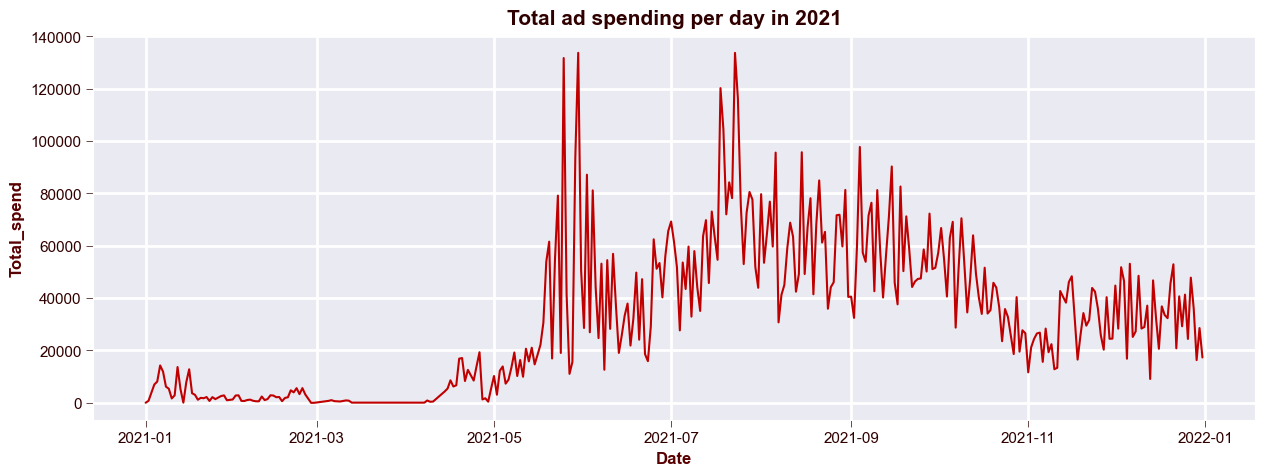

In [13]:
fig, axs = plt.subplots(figsize = (15, 5))

axs.plot(fb_day_spend, color = '#C00000')

plt.tick_params(axis = 'both', grid_linewidth = 2,
                labelsize = 11, colors = '#300000', pad = 3,
                which = 'both', bottom = True, left = True,
                direction = 'out', length = 5, width = 0.5)

axs.set_xlabel('Date', fontsize = 12, fontweight = 'semibold', color = '#590000')
axs.set_ylabel('Total_spend', fontsize = 12, fontweight = 'semibold', color = '#590000')

axs.set_title('Total ad spending per day in 2021', fontsize = 15,
              fontweight = 'semibold', color = '#300000', pad = 8)

plt.show()

---
### Moving average of daily ad spending in 2021

---

In [15]:
# calculation of the moving average of ad spending (15 previous values)
fb_day_spend['moving_avg_spend'] = fb_day_spend.rolling(15, min_periods = 3).mean()
fb_day_spend.head(20)

total_spend  moving_avg_spend
ad_date                                  
2021-01-01           39               NaN
2021-01-02          774               NaN
2021-01-04         7006       2606.333333
2021-01-05         8115       3983.500000
2021-01-06        14277       6042.200000
2021-01-07        11942       7025.500000
2021-01-08         6197       6907.142857
2021-01-09         5363       6714.125000
2021-01-10         1680       6154.777778
2021-01-11         2846       5823.900000
2021-01-12        13670       6537.181818
2021-01-13         5286       6432.916667
2021-01-14           72       5943.615385
2021-01-15         7833       6078.571429
2021-01-16        12821       6528.066667
2021-01-17         3666       6769.866667
2021-01-18         3063       6922.466667
2021-01-19         1184       6534.333333
2021-01-20         1905       6120.333333
2021-01-21         1766       5286.266667

Text(0.5, 1.0, 'Moving average of spending in 2021')

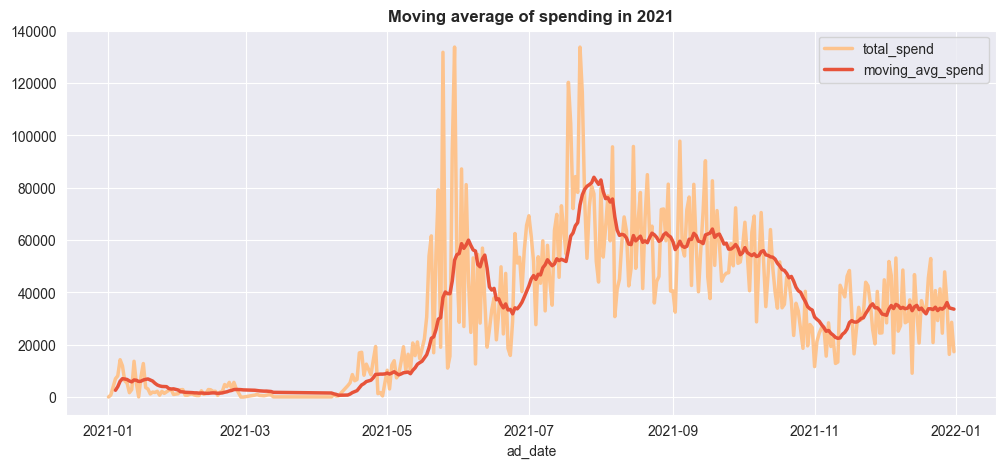

In [16]:
plt.subplots(figsize = (12, 5))

sns.lineplot(data = fb_day_spend,
             palette = 'OrRd',
             linewidth = 2.5,
             dashes = False)

plt.title("Moving average of spending in 2021", fontweight = 'semibold')

---
### Chart with daily ROMI values in 2021

---

In [18]:
# mean ROMI value by day
fb_day_romi = fabd_gr_day[['romi']].agg('mean')
#fb_day_romi

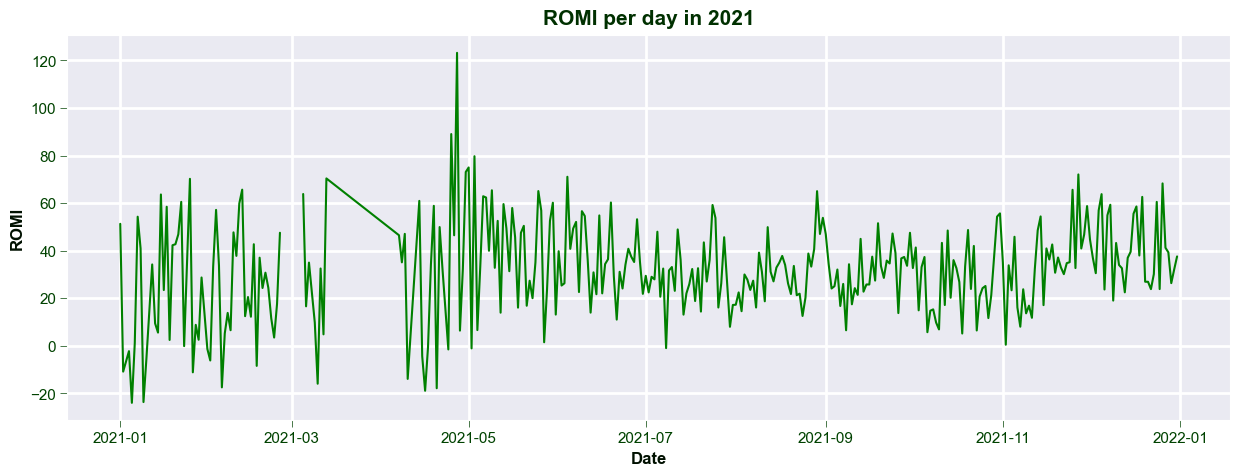

In [19]:
fig, axs = plt.subplots(figsize = (15, 5))

axs.plot(fb_day_romi, color = 'g')

plt.tick_params(axis = 'both', grid_linewidth = 2,
                labelsize = 11, colors = '#004200', pad = 3,
                which = 'both', bottom = True, left = True,
                direction = 'out', length = 5, width = 0.5)

axs.set_xlabel('Date', fontsize = 12, fontweight = 'semibold', color = '#001000')
axs.set_ylabel('ROMI', fontsize = 12, fontweight = 'semibold', color = '#001000')

axs.set_title('ROMI per day in 2021', fontsize = 15,
              fontweight = 'semibold', color = '#003000', pad = 8)

plt.show()

---
### Moving average of daily ROMI values in 2021

---

In [21]:
# calculation of the moving average of ROMI (15 previous values)
fb_day_romi['moving_avg_romi'] = fb_day_romi.rolling(15, min_periods = 3).mean()

In [22]:
fb_day_romi.head(20)

romi  moving_avg_romi
ad_date                               
2021-01-01  51.282051              NaN
2021-01-02 -10.852713              NaN
2021-01-04  -2.269483        12.719952
2021-01-05 -23.992606         3.541812
2021-01-06   1.121233         3.057696
2021-01-07  54.271043        11.593254
2021-01-08  40.941973        15.785928
2021-01-09 -23.662129        10.854921
2021-01-10  -5.595238         9.027126
2021-01-11  13.984540         9.522867
2021-01-12  34.199969        11.766240
2021-01-13   9.417460        11.570508
2021-01-14   5.555556        11.107820
2021-01-15  63.621141        14.858771
2021-01-16  23.436329        15.430608
2021-01-17  58.456083        15.908877
2021-01-18   2.446605        16.795498
2021-01-19  42.276786        19.765250
2021-01-20  42.707783        24.211942
2021-01-21  46.898039        27.263729

Text(0.5, 1.0, 'Moving average of ROMI in 2021')

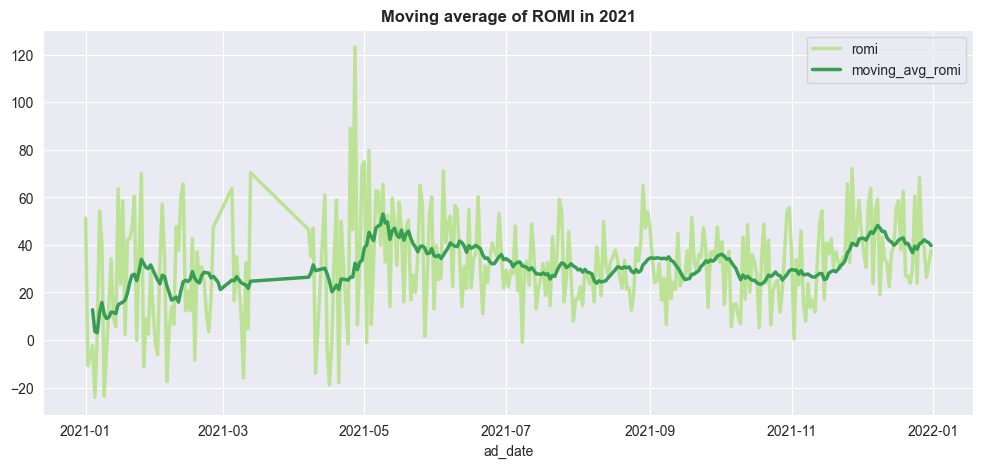

In [23]:
plt.subplots(figsize = (12, 5))

sns.lineplot(data = fb_day_romi,
             palette = 'YlGn',
             linewidth = 2.5,
             dashes = False)

plt.title("Moving average of ROMI in 2021", fontweight = 'semibold')

___
## Total ad spending and ROMI for individual advertising campaigns 
---

In [25]:
# grouping data by campaign name
fabd_gr_campaign = fabd.groupby(by = ['campaign_name'])

---
### Chart of total ad spending for each campaign
---

In [27]:
# aggregate ad spending by campaign
fabd_campaign_spend = fabd_gr_campaign[['total_spend']].agg('sum')
#fabd_campaign_spend

In [28]:
plt.subplots(figsize = (13, 5))

ax = sns.barplot(x = 'campaign_name', y = 'total_spend', data = fabd_campaign_spend,
                 hue = 'campaign_name', palette = 'viridis')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f', fontsize = 10.5, padding = 2)

ax.tick_params(axis = 'x', pad = 5, labelsize = 11)

plt.xlabel('Campaign name', labelpad = 10, color = "#41336a",
           fontsize = 11, fontweight = 'ultralight', fontstyle = 'italic')
plt.ylabel('Total spend', labelpad = 10, color = "#41336a",
           fontsize = 11, fontweight = 'ultralight', fontstyle = 'italic')

plt.title("Total ad spending by campaign", color = "#41336a",
          fontsize = 13, fontweight = 'semibold')

Text(0.5, 1.0, 'Total ad spending by campaign')

---
### Chart of mean ROMI value for each campaign
---

In [30]:
# mean ROMI value in each campaign
fabd_campaign_romi = fabd_gr_campaign[['romi']].agg('mean').rename(columns = {'romi': 'ROMI_mean'})
#fabd_campaign_romi

Text(0.5, 1.0, 'Mean value of ROMI rate per campaign')

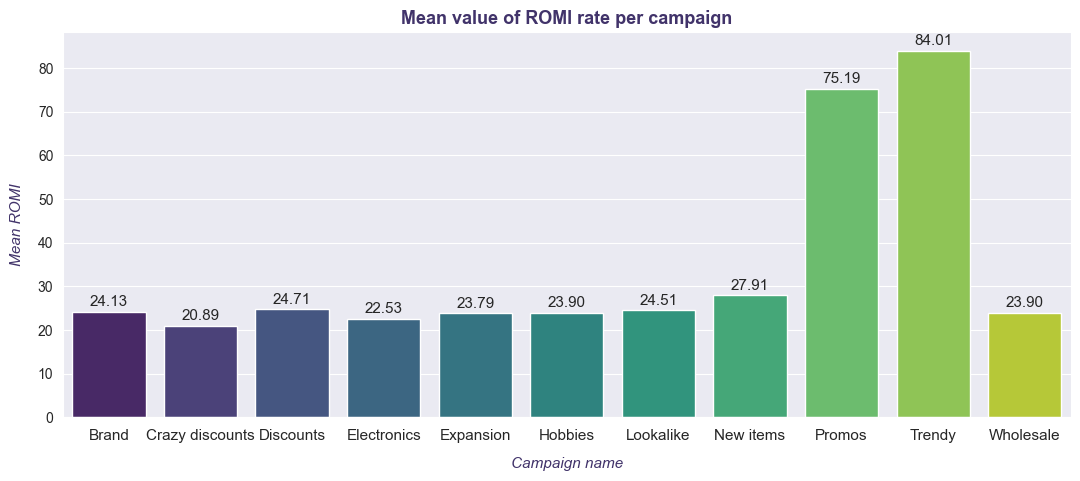

In [31]:
plt.subplots(figsize = (13, 5))

ax = sns.barplot(x = 'campaign_name', y = 'ROMI_mean', data = fabd_campaign_romi,
                 hue = 'campaign_name', palette = 'viridis')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f', fontsize = 11, padding = 2)

ax.tick_params(axis = 'x', pad = 5, labelsize = 11)

plt.xlabel('Campaign name', labelpad = 10, color = "#41336a",
           fontsize = 11, fontweight = 'ultralight', fontstyle = 'italic')
plt.ylabel('Mean ROMI', labelpad = 10, color = "#41336a",
           fontsize = 11, fontweight = 'ultralight', fontstyle = 'italic')

plt.title("Mean value of ROMI rate per campaign", color = "#41336a",
          fontsize = 13, fontweight = 'semibold')

___

## Daily distribution of the ROMI rate in each campaign
---

In [33]:
# grouping values by campaign name and date
fabd_gr_campaign_day = fabd.groupby(by = ['campaign_name', 'ad_date'])

In [34]:
# aggregation of grouped data by mean ROMI value
campaign_day_romi = fabd_gr_campaign_day[['romi']].agg('mean')
campaign_day_romi

romi
campaign_name ad_date              
Brand         2020-12-25  53.867152
              2020-12-26  44.841270
              2020-12-27  26.680349
              2020-12-28  31.860632
              2020-12-29 -16.791045
...                             ...
Wholesale     2022-01-01        NaN
              2022-01-02        NaN
              2022-01-03        NaN
              2022-01-04        NaN
              2022-01-05        NaN

[1494 rows x 1 columns]

Text(0.5, 1.0, 'Daily distribution of the ROMI rate per campaign')

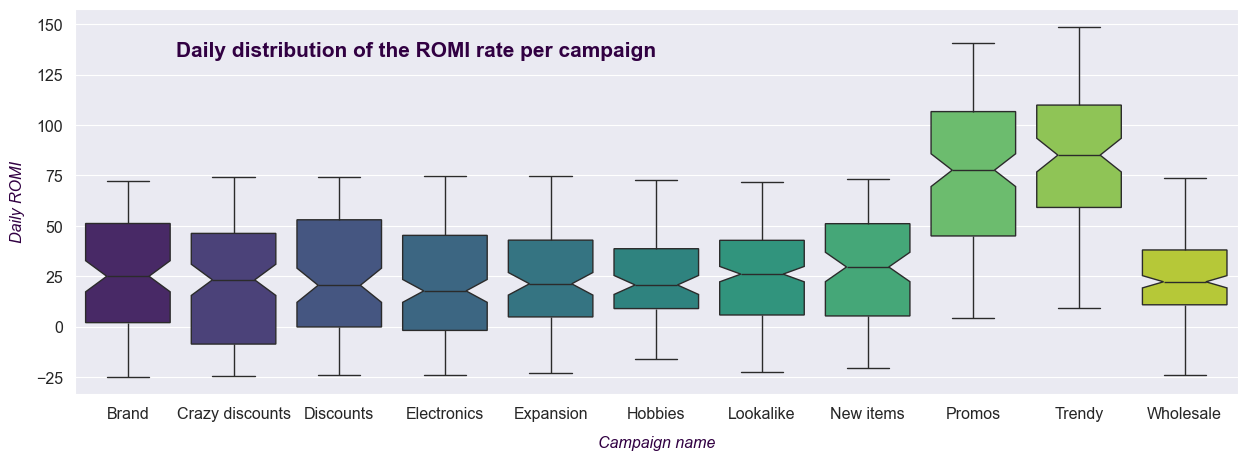

In [35]:
plt.subplots(figsize = (15, 5))

ax = sns.boxplot(x = "campaign_name", y = "romi", data = campaign_day_romi,
                 hue = "campaign_name", palette = 'viridis', notch = True)

ax.tick_params(axis = 'both', pad = 5, labelsize = 11.5)

plt.xlabel('Campaign name', labelpad = 10, color = '#310042',
           fontsize = 11.5, fontweight = 'ultralight', fontstyle = 'italic')
plt.ylabel('Daily ROMI', labelpad = 8, color = "#310042",
           fontsize = 11.5, fontweight = 'ultralight', fontstyle = 'italic')

plt.title("Daily distribution of the ROMI rate per campaign",
          color = "#310042", fontsize = 15, fontweight = 'semibold',
          pad = -34, horizontalalignment = 'right')

____
## Distribution of ROMI values
---

Text(0.5, 1.0, 'Histogram with distribution of ROMI values')

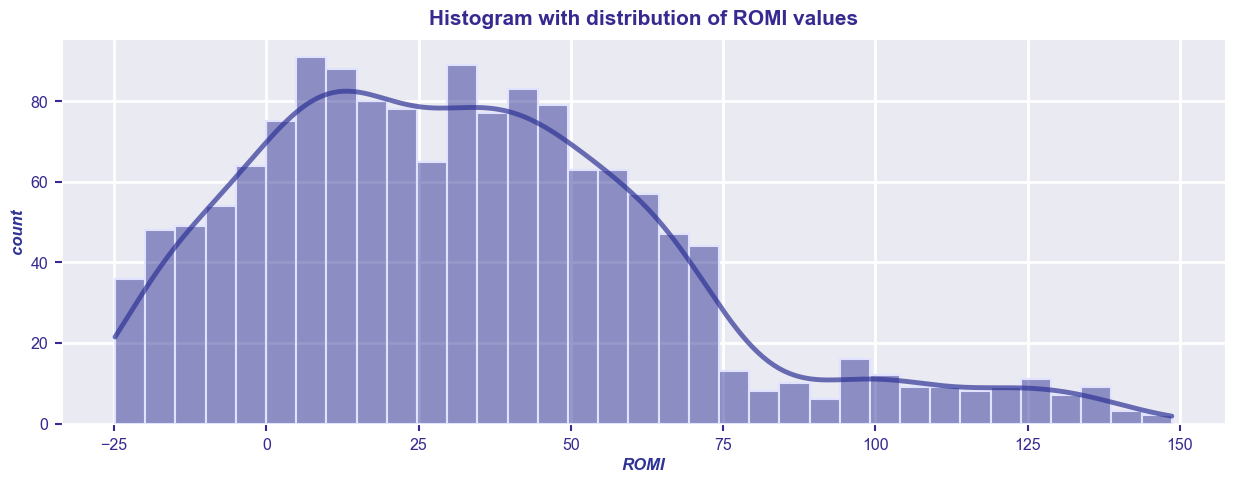

In [37]:
romi_hist = fabd[['ad_date', 'romi']]

plt.subplots(figsize = (15, 5))

sns.histplot(x = 'romi', data = romi_hist, bins = 35,
             color = '#2F3496', alpha = 0.5, cbar = True,
             linewidth = 1.5, edgecolor = '#E1E2FF',
             kde = True, line_kws = {'lw': 3.5, 'alpha': 0.7})

plt.xlabel('ROMI', color = "#2F3496", fontsize = 12, fontweight = 'semibold', fontstyle = 'italic')
plt.ylabel('count', color = "#2F3496", fontsize = 12, fontweight = 'semibold', fontstyle = 'italic')

plt.tick_params(axis = 'both', pad = 5, labelsize = 11.5, colors = '#362A91',
                which = 'both', bottom = True, left = True, direction = 'out',
                length = 5, width = 1.5, grid_linewidth = 2)

plt.title("Histogram with distribution of ROMI values", pad = 10,
          color = "#362A91", fontsize = 15, fontweight = 'semibold')

___
## Correlations between values of quantitative variables

---

In [39]:
fabd.head()

ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0 2020-11-11     Discounts          189               1800            45   
1 2020-11-12     Discounts         2300              10473           397   
2 2020-11-13     Discounts          636              11669           451   
3 2020-11-14     Discounts          727               5005           392   
4 2020-11-15     Discounts          698              12465           657   

   total_value       cpc         cpm       ctr       romi  
0          238  4.200000  105.000000  2.500000  25.925926  
1         2113  5.793451  219.612336  3.790700  -8.130435  
2          977  1.410200   54.503385  3.864941  53.616352  
3         1267  1.854592  145.254745  7.832168  74.277854  
4         1096  1.062405   55.996791  5.270758  57.020057

In [40]:
# selecting columns with numerical values
col_corr = fabd.loc[:, 'total_spend':'romi']
col_corr

total_spend  total_impressions  total_clicks  total_value         cpc  \
0             189               1800            45          238    4.200000   
1            2300              10473           397         2113    5.793451   
2             636              11669           451          977    1.410200   
3             727               5005           392         1267    1.854592   
4             698              12465           657         1096    1.062405   
...           ...                ...           ...          ...         ...   
1489        71403              33358           115        68034  620.895652   
1490        33591              27562            69        47261  486.826087   
1491        22745               6054            58        19187  392.155172   
1492            0                  0             0            0         NaN   
1493            0                  0             0            0         NaN   

              cpm       ctr       romi  
0      105.000000  2.500000  25.925926  
1      219.612336  3.790700  -8.130435  
2       54.503385  3.864941  53.616352  
3      145.254745  7.832168  74.277854  
4       55.996791  5.270758  57.020057  
...           ...       ...        ...  
1489  2140.506026  0.344745  -4.718289  
1490  1218.743197  0.250345  40.695424  
1491  3757.020152  0.958044 -15.642998  
1492          NaN       NaN        NaN  
1493          NaN       NaN        NaN  

[1494 rows x 8 columns]

___
### Overview charts
---

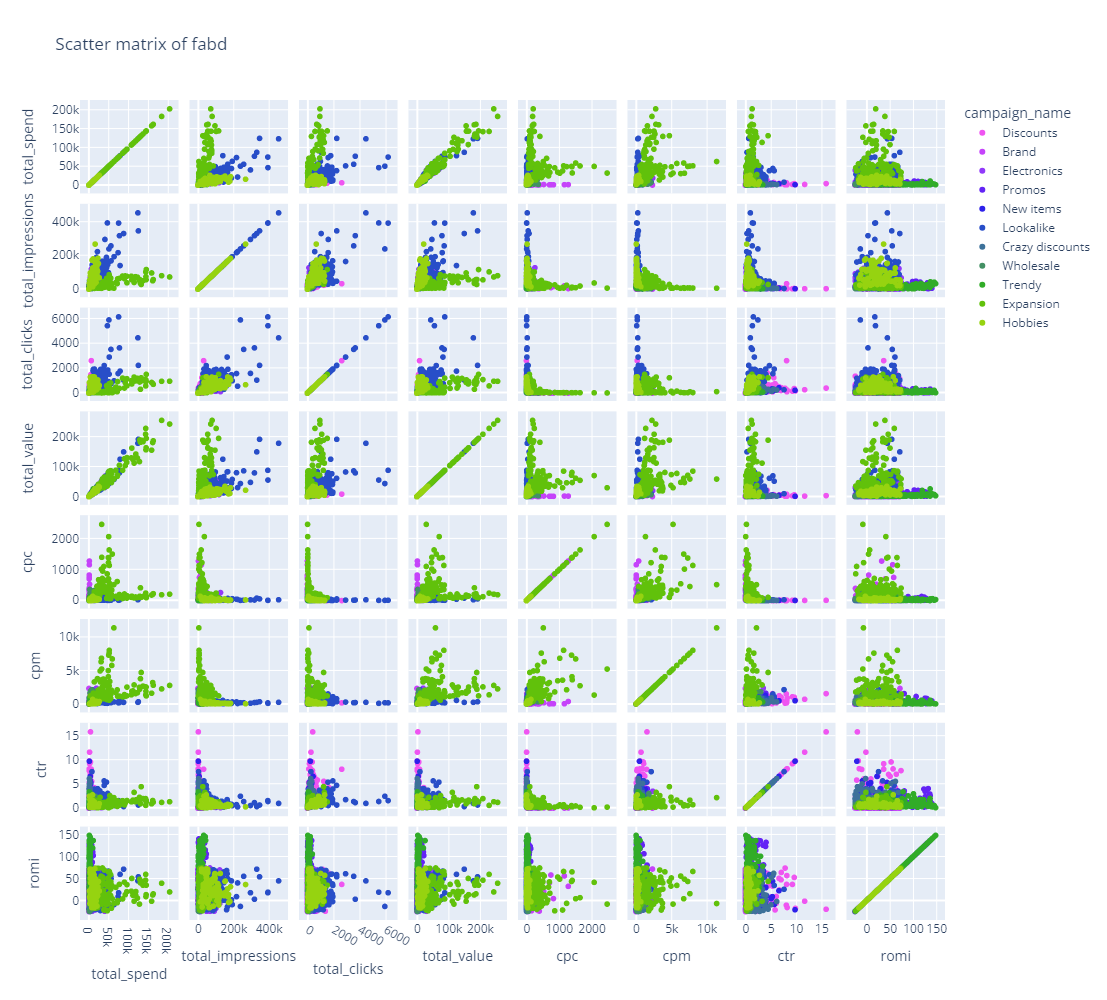

In [42]:
import plotly.express as px

fig = px.scatter_matrix(fabd, dimensions = col_corr, title="Scatter matrix of fabd", 
                        color = "campaign_name", color_discrete_sequence = px.colors.cyclical.mygbm_r)
fig.update_layout(autosize = False, width = 1100, height = 1000)
fig.show()

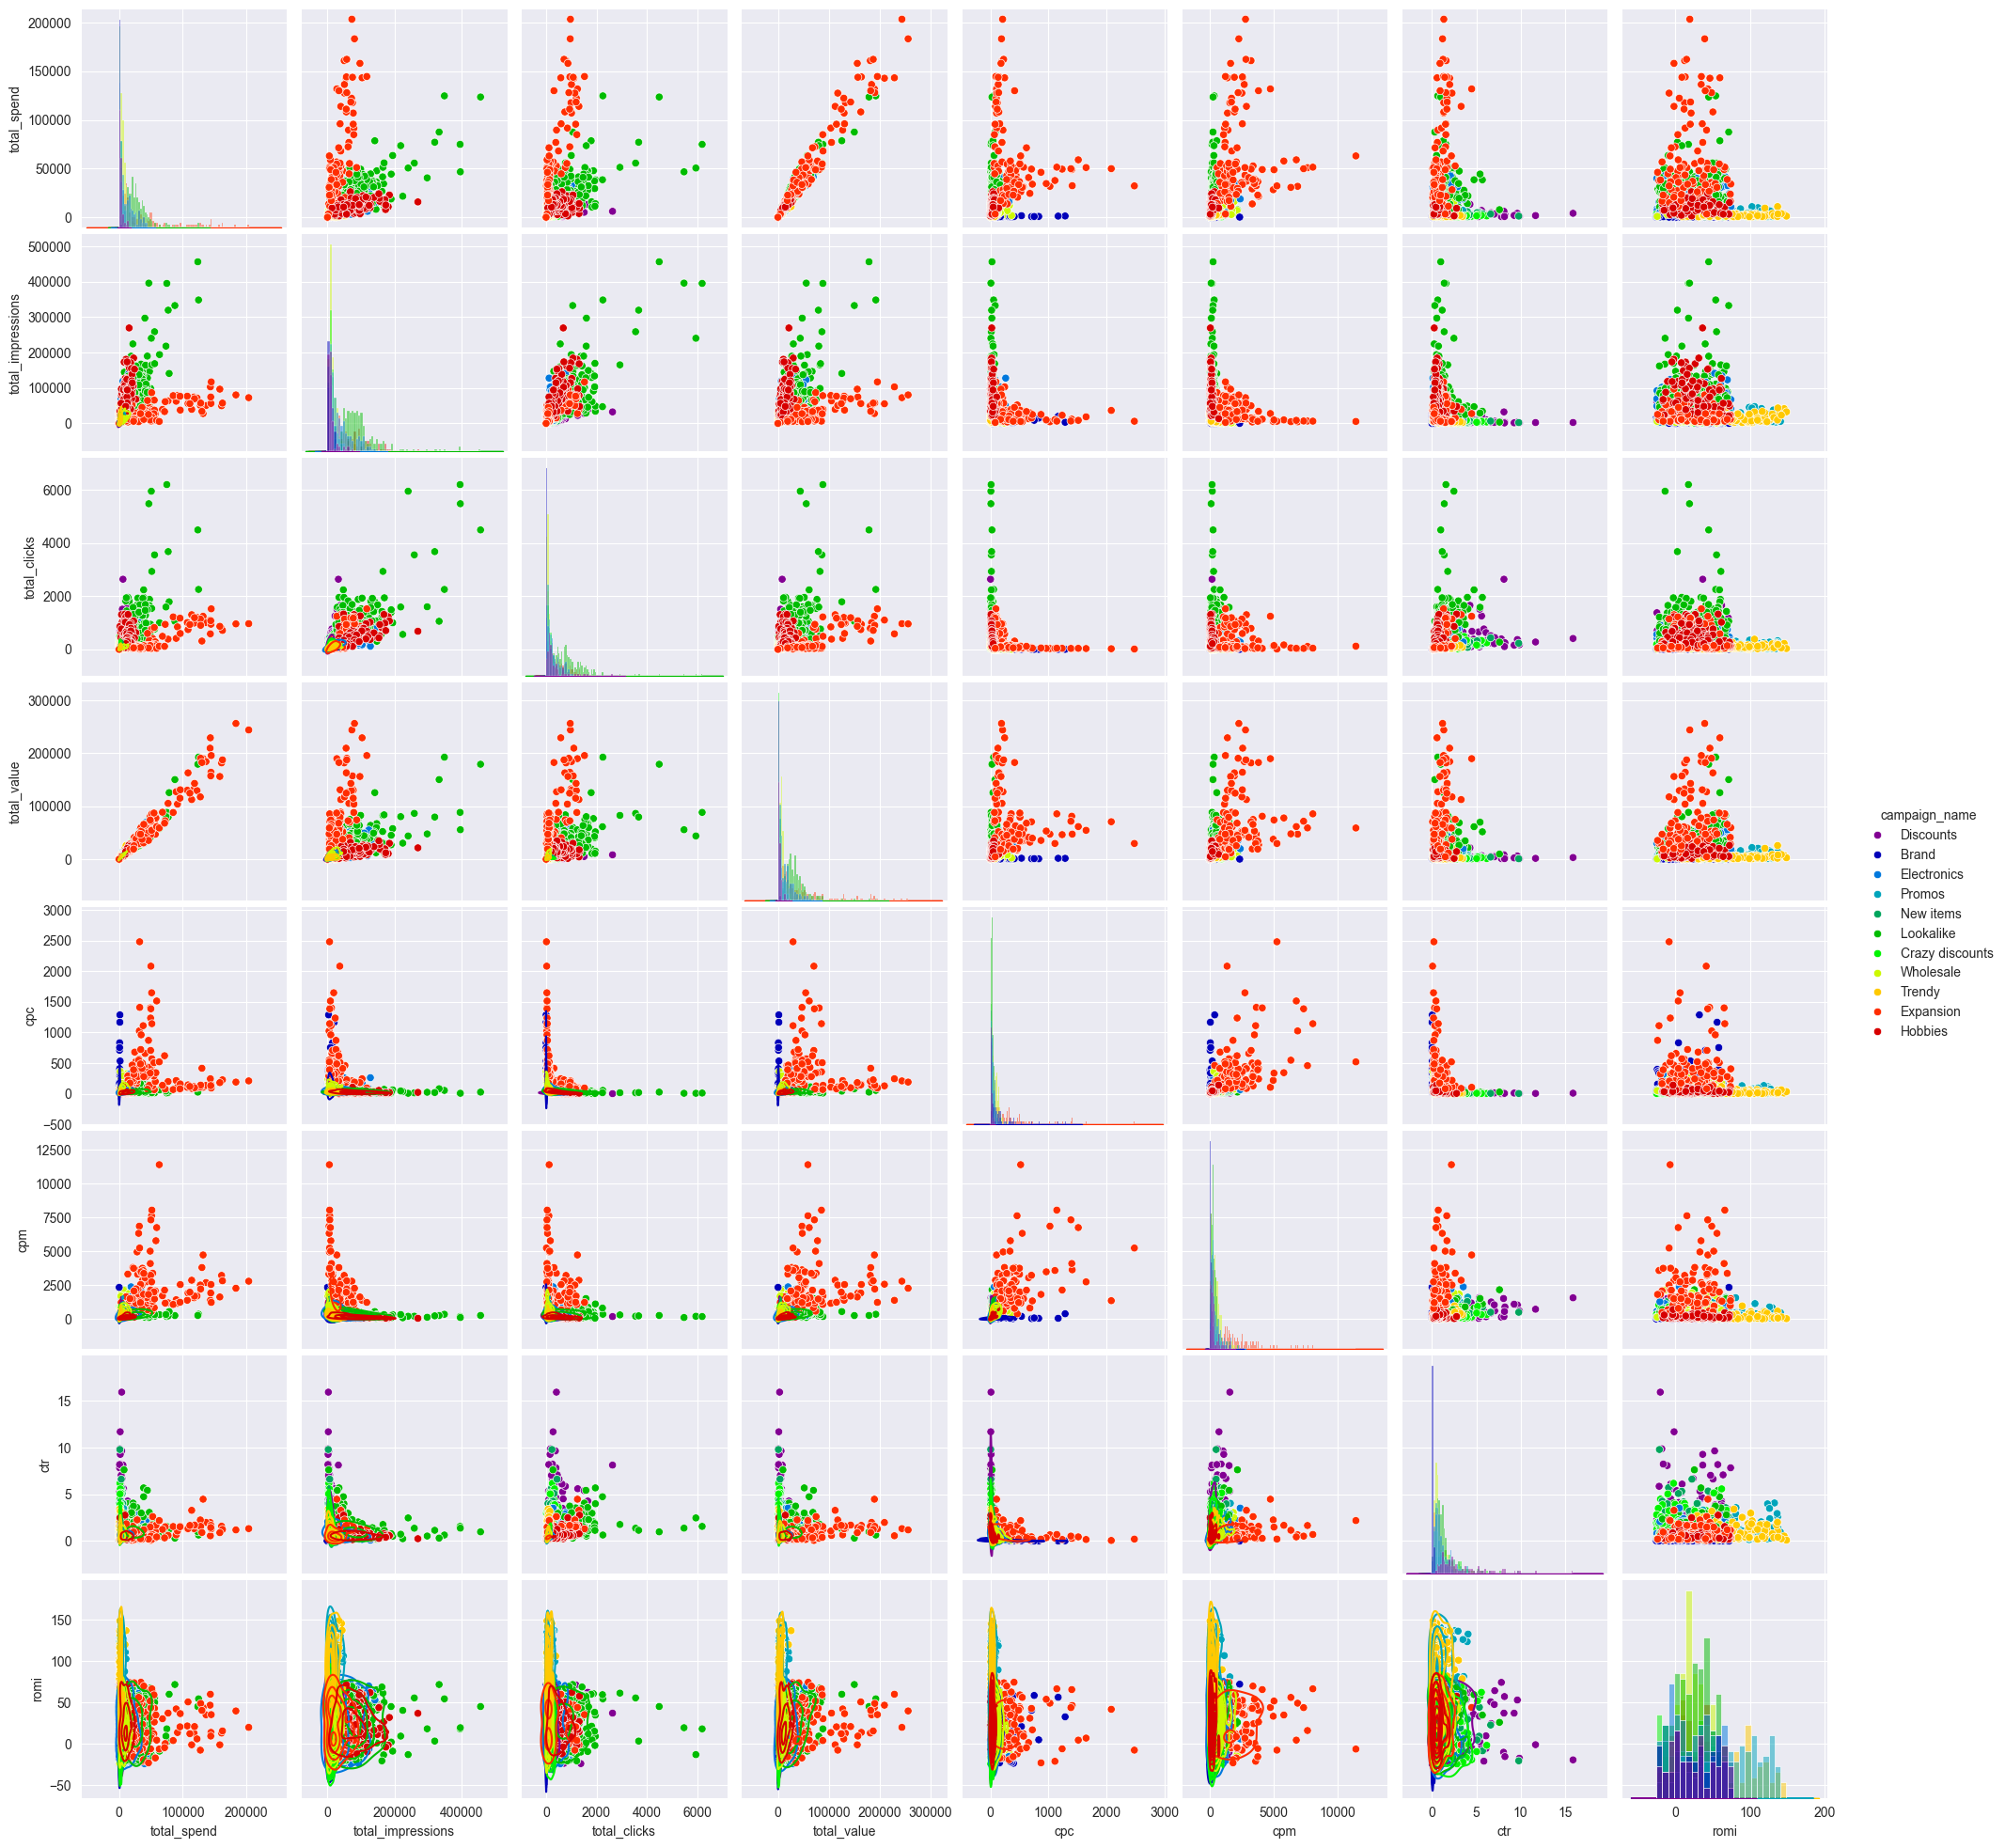

In [43]:
# Plot pairwise relationships in a dataset 'fabd'
pp = sns.pairplot(fabd, hue = 'campaign_name', palette = 'nipy_spectral')

pp.map_upper(sns.scatterplot)
pp.map_lower(sns.kdeplot)
pp.map_diag(sns.histplot)

____
### Heatmaps
---

In [45]:
# calculation of correlation between all quantitative variables
corr_cmap = col_corr.corr()
corr_cmap.style.background_gradient(cmap = "RdYlGn", vmin=-1, vmax=1)

Text(0.5, 1.0, 'Correlation heat map of all data')

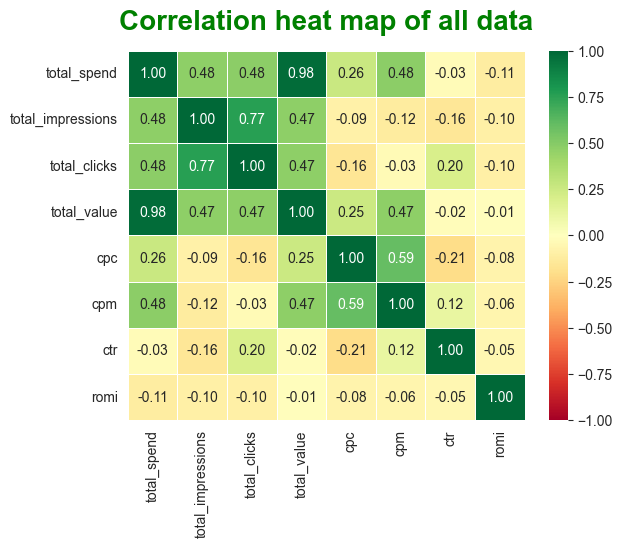

In [46]:
#creation of the heat map in the form of a graph

ax = sns.heatmap(corr_cmap, vmin = -1, vmax = 1, cmap = "RdYlGn", linewidth = 0.5,
                 annot = True, fmt = ".2f", annot_kws = {"fontsize": 10})

plt.title("Correlation heat map of all data", pad = 15, color = "g",
          fontsize = 20, fontweight = 'semibold')

___
### Analysis of correlation coefficients
---

In [48]:
# overview map of absolute values of correlations
corr_abs = corr_cmap.abs()
corr_abs.style.background_gradient(cmap = "YlGn", vmin = 0, vmax = 1)

____
#### Highest and lowest correlation coefficient - method I
---

---
##### Lowest correlation coefficient (indicating no correlation)
---

In [51]:
# identification of names of related variables with the lowest correlation
corr_id_min_values = corr_abs[corr_abs < 1].idxmin()

# creating a DataFrame based on them
corr_id_min_values = pd.DataFrame(data = corr_id_min_values, columns = ['col2'])

# identifying the lowest correlation values and attaching them to the created DF
corr_min_val_abs = corr_abs[corr_abs < 1].min()
corr_id_min_values['corr_min_abs'] = round(corr_min_val_abs, 4)
#corr_id_min_values

In [52]:
# sorting by correlation values, resetting indexes and changing the name of the column (previous index)
corr_id_min_values = corr_id_min_values.sort_values(by = 'corr_min_abs').reset_index().rename(columns = {'index': 'col1'})
#corr_id_min_values

In [53]:
# finding the real correlation values corresponding to the absolute values in the DF

corr_min_val_cmap = []       # empty list for correlation values

for index, row in corr_id_min_values.iterrows():            # iterative extraction of values from the correlation map and addition to the prepared list
    corr_min_val = corr_cmap.loc[row['col1'], row['col2']]
    corr_min_val_cmap.append(corr_min_val)

corr_id_min_values['corr_min_value'] = corr_min_val_cmap    # adding the list to the DF as another column
#corr_id_min_values

In [54]:
corr_id_min_values.drop_duplicates(subset = ['corr_min_value'], inplace = True)
corr_id_min_values.reset_index(drop = True, inplace = True)
corr_id_min_values

col1         col2  corr_min_abs  corr_min_value
0        total_value         romi        0.0137       -0.013733
1                ctr  total_value        0.0223       -0.022267
2        total_spend          ctr        0.0255       -0.025495
3       total_clicks          cpm        0.0328       -0.032830
4                cpc         romi        0.0769       -0.076919
5  total_impressions          cpc        0.0931       -0.093070

In [55]:
print('Lowest correlation coefficient:')
corr_id_min_values.iloc[0,[0,1,3]]

Lowest correlation coefficient:


col1              total_value
col2                     romi
corr_min_value      -0.013733
Name: 0, dtype: object

---
##### Highest correlation coefficient
---

In [57]:
# identification of names of related variables with the highest correlation
corr_id_max_values = corr_abs[corr_abs < 1].idxmax()

# creating a DataFrame based on them
corr_id_max_values = pd.DataFrame(data = corr_id_max_values, columns = ['col2'])

# identifying the highest correlation values and attaching them to the created DF
corr_max_val_abs = corr_abs[corr_abs < 1].max()
corr_id_max_values['corr_max_abs'] = round(corr_max_val_abs, 4)
#corr_id_max_values

In [58]:
# sorting by correlation values, resetting indexes and changing the name of the column (previous index)
corr_id_max_values = corr_id_max_values.sort_values(by = 'corr_max_abs', ascending = False).reset_index().rename(columns = {'index': 'col1'})
#corr_id_max_values

In [59]:
# finding the real correlation values corresponding to the absolute values in the DF

corr_max_val_cmap = []        # empty list for correlation values

for index, row in corr_id_max_values.iterrows():            # iterative extraction of values from the correlation map and addition to the prepared list
    corr_max_val = corr_cmap.loc[row['col1'], row['col2']]
    
    corr_max_val_cmap.append(corr_max_val)

corr_id_max_values['corr_max_value'] = corr_max_val_cmap    # adding the list to the DF as another column
#corr_id_max_values

In [60]:
corr_id_max_values.drop_duplicates(subset = ['corr_max_value'], inplace = True)
corr_id_max_values.reset_index(drop = True, inplace = True)
corr_id_max_values

col1          col2  corr_max_abs  corr_max_value
0        total_spend   total_value        0.9789        0.978890
1  total_impressions  total_clicks        0.7655        0.765489
2                cpc           cpm        0.5938        0.593777
3                ctr           cpc        0.2107       -0.210712
4               romi   total_spend        0.1149       -0.114859

In [61]:
print('Highest correlation coefficient:')
corr_id_max_values.iloc[0,[0,1,3]]

Highest correlation coefficient:


col1              total_spend
col2              total_value
corr_max_value        0.97889
Name: 0, dtype: object

____
#### Highest and lowest correlation coefficient - method II
---

In [63]:
# transforming the correlation matrix into a format that can be analyzed
corr_unstacked = corr_cmap.unstack()
corr_unstacked

total_spend  total_spend          1.000000
             total_impressions    0.475607
             total_clicks         0.480066
             total_value          0.978890
             cpc                  0.262341
                                    ...   
romi         total_value         -0.013733
             cpc                 -0.076919
             cpm                 -0.062669
             ctr                 -0.049992
             romi                 1.000000
Length: 64, dtype: float64

In [64]:
# selecting only positive correlation values (omitting 1) and sorting them in descending order
positive_val_sort = corr_unstacked[(corr_unstacked >=0) & (corr_unstacked < 1)].sort_values(ascending = False)

# creation of a DataFrame based on the above values
positive_val_sort = pd.DataFrame(positive_val_sort)

# reset DF indexes, rename columns and remove duplicate correlation values
positive_val_sort = positive_val_sort.reset_index().rename(columns = {'level_0': 'col1',
                                                                      'level_1': 'col2',
                                                                      0: 'corr'}
                                                          ).drop_duplicates(subset = ['corr'])
positive_val_sort.reset_index(drop = True, inplace = True)

In [65]:
# selecting only negative correlation values and sorting them in ascending order
negative_val_sort = corr_unstacked[corr_unstacked < 0].sort_values(ascending = True)

# creation of a DataFrame based on the above values
negative_val_sort = pd.DataFrame(negative_val_sort)

# reset DF indexes, rename columns and remove duplicate correlation values
negative_val_sort = negative_val_sort.reset_index().rename(columns = {'level_0': 'col1',
                                                                      'level_1': 'col2',
                                                                      0: 'corr'}
                                                          ).drop_duplicates(subset = ['corr'])
negative_val_sort.reset_index(drop = True, inplace = True)

In [66]:
# auxiliary absolute values of negative correlation values
negative_abs = negative_val_sort['corr'].abs()
negative_abs

0     0.210712
1     0.159486
2     0.155701
3     0.121095
4     0.114859
5     0.101495
6     0.099520
7     0.093070
8     0.076919
9     0.062669
10    0.049992
11    0.032830
12    0.025495
13    0.022267
14    0.013733
Name: corr, dtype: float64

In [67]:
print('Highest correlation coefficient:')

if (negative_abs.iloc[0] > positive_val_sort.iloc[0,2]):
    print (negative_val_sort.iloc[0,:])
else:
    print (positive_val_sort.iloc[0,:])

Highest correlation coefficient:
col1    total_spend
col2    total_value
corr        0.97889
Name: 0, dtype: object


In [68]:
print('Lowest correlation coefficient:')

if (negative_abs.iloc[-1] < positive_val_sort.iloc[-1,2]):
    print (negative_val_sort.iloc[-1,:])
else:
    print (positive_val_sort.iloc[-1,:])

Lowest correlation coefficient:
col1    total_value
col2           romi
corr      -0.013733
Name: 14, dtype: object


____
#### Summary
---

As mentioned above, the lowest correlation coefficient (absolute values) is observed in the relationship between 'total_value' and 'romi' – the correlation coefficient value of -0.0137 indicates a complete lack of correlation, similar to at least 8 other relationships in the analysed data.

The highest correlation coefficient is observed in the relationship between 'total_value' and 'total_spend' – a correlation coefficient of 0.9789 indicates a perfect positive correlation, meaning that these parameters are directly proportional to each other. There is also a very high correlation between 'total_impressions' and 'total_clicks' (correlation coefficient: 0.7655) and a moderate correlation (0.5937) between 'cpm' and 'cpc'.



Other parameters with which 'total_value' is correlated:

In [70]:
total_value_corr = corr_abs.loc['total_value'].sort_values(ascending = False)

print("'total_value' is moderately correlated with:\n",
      total_value_corr.index[2], '(', round(total_value_corr.iloc[2], 4),')\n',
      total_value_corr.index[3], '(', round(total_value_corr.iloc[3], 4),')\n',
      total_value_corr.index[4], '(', round(total_value_corr.iloc[4], 4), ')' )

'total_value' is moderately correlated with:
 total_clicks ( 0.4721 )
 total_impressions ( 0.472 )
 cpm ( 0.4713 )


___
#### Visualisation of the correlation between 'total_value' and 'total_spend'
---

<Axes: xlabel='total_spend', ylabel='total_value'>

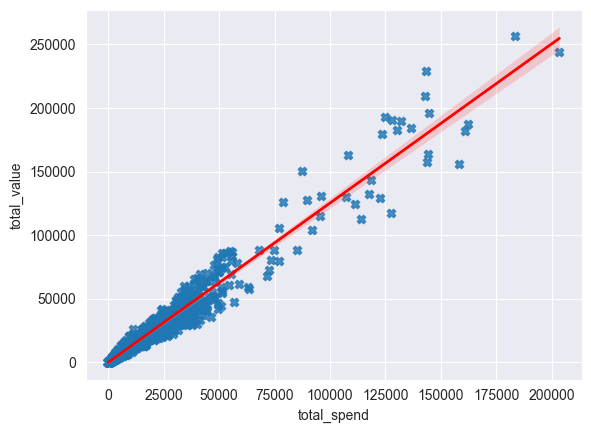

In [72]:
# version I
sns.regplot(x = "total_spend", y = "total_value", data = fabd, 
            line_kws = {'lw': 2, 'color': 'r'}, marker = "X")

<Axes: xlabel='total_spend', ylabel='total_value'>

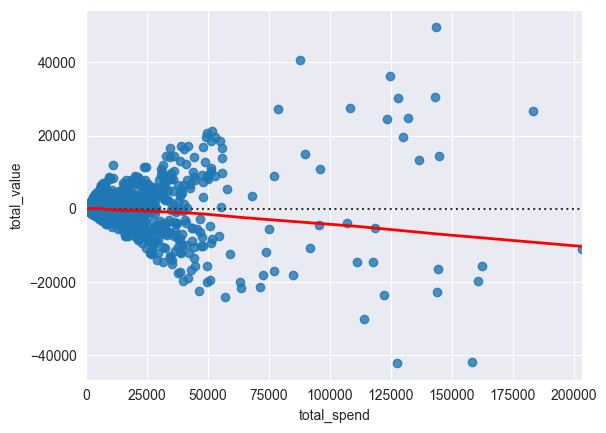

In [73]:
# version II
sns.residplot(x = "total_spend", y = "total_value", data = fabd,
              lowess = True, line_kws = {'lw': 2, 'color': 'r'})

Text(0.5, 1.0, "The correlation between the values of 'total_spend' & 'total_value' - linear regression plot")

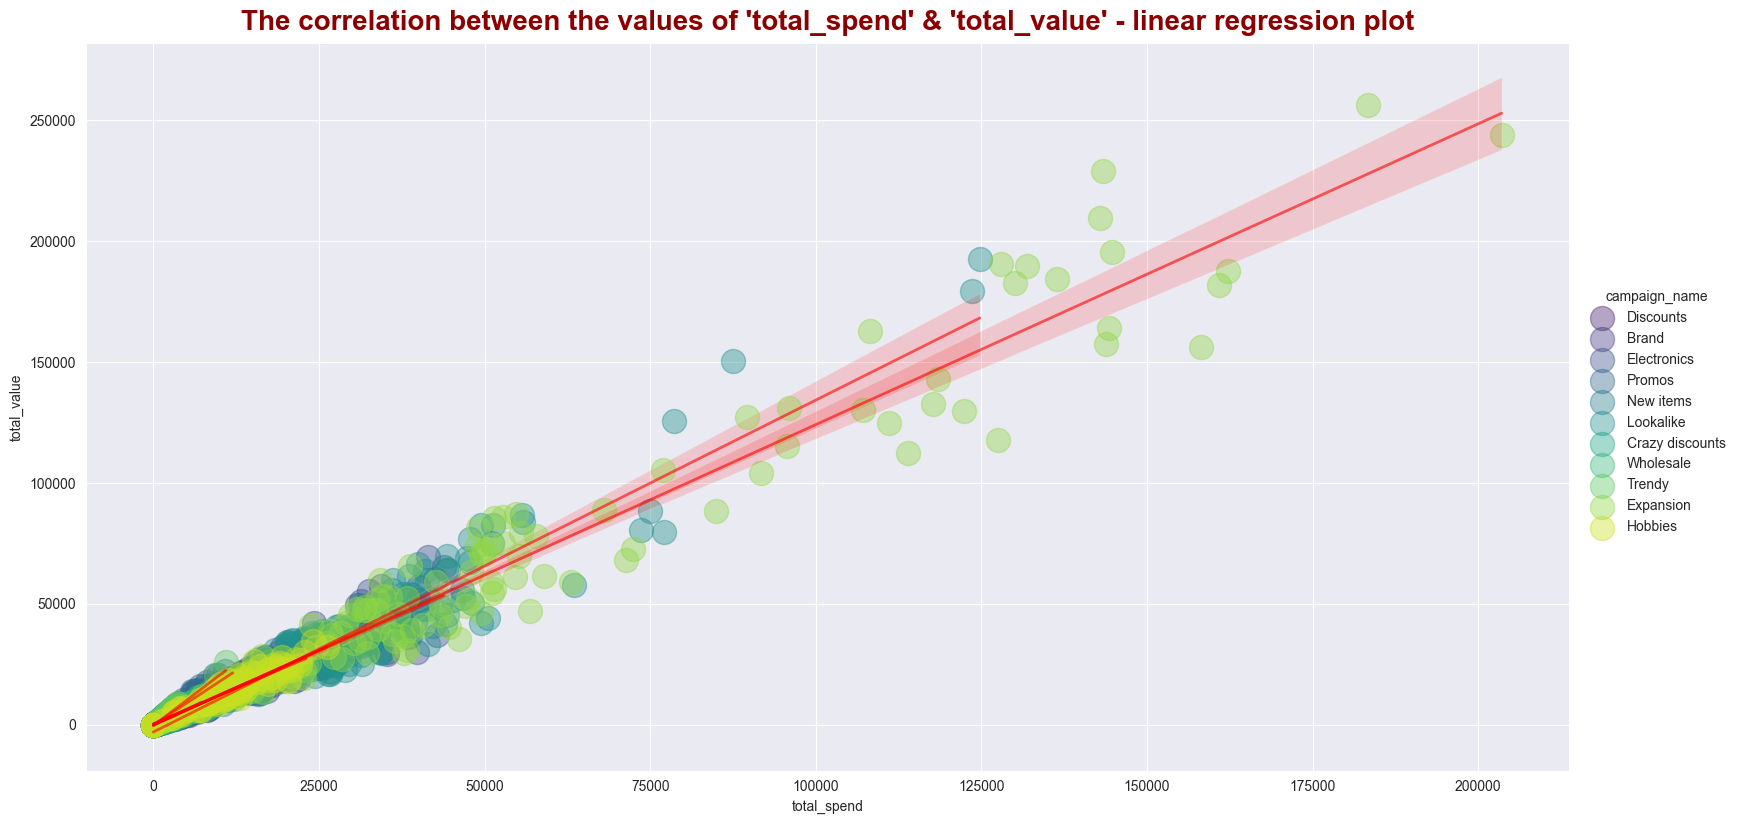

In [74]:
# version III
#sns.set_context("notebook", font_scale = 1.5)

sns.lmplot(x = "total_spend", y = "total_value", data = fabd,
           hue = 'campaign_name', palette = 'viridis',
           scatter_kws = {'alpha': 0.4, 's': 300},
           line_kws={'lw': 2, 'color': 'r', 'alpha':0.6},
           height = 8, aspect = 2)

plt.title("The correlation between the values of 'total_spend' & 'total_value' - linear regression plot",
          fontsize = 20, fontweight = 'semibold', color = "darkred", pad = 10)